In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 0. Load Data

In [4]:
data = pd.read_csv('../data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## 1. Data Analysis: First Sight

First doubt I have. is Emp-O == Emp-I Always?

In [5]:
(data['Emp-O'] == data['Emp-I']).all()

False

So actually it is not always the case. Let's see when it is not. 

In [6]:
data[data['Emp-O'] != data['Emp-I']].head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
345,2017-01-21 22:30:00,2291,SCEL,SABE,AUT,2017-01-21 22:28:00,2291,SCEL,SABE,ARG,21,1,2017,Sabado,I,Austral,Santiago,Buenos Aires
814,2017-01-01 07:14:00,624,SCEL,SPJC,AVA,2017-01-01 07:11:00,624,SCEL,SPJC,LRC,1,1,2017,Domingo,I,Avianca,Santiago,Lima
815,2017-01-02 07:00:00,624,SCEL,SPJC,AVA,2017-01-02 07:05:00,624,SCEL,SPJC,LRC,2,1,2017,Lunes,I,Avianca,Santiago,Lima
816,2017-01-03 07:14:00,624,SCEL,SPJC,AVA,2017-01-03 07:14:00,624,SCEL,SPJC,LRC,3,1,2017,Martes,I,Avianca,Santiago,Lima
817,2017-01-04 07:00:00,624,SCEL,SPJC,AVA,2017-01-04 07:24:00,624,SCEL,SPJC,LRC,4,1,2017,Miercoles,I,Avianca,Santiago,Lima


Might be relevant

### How is the date distribuited?

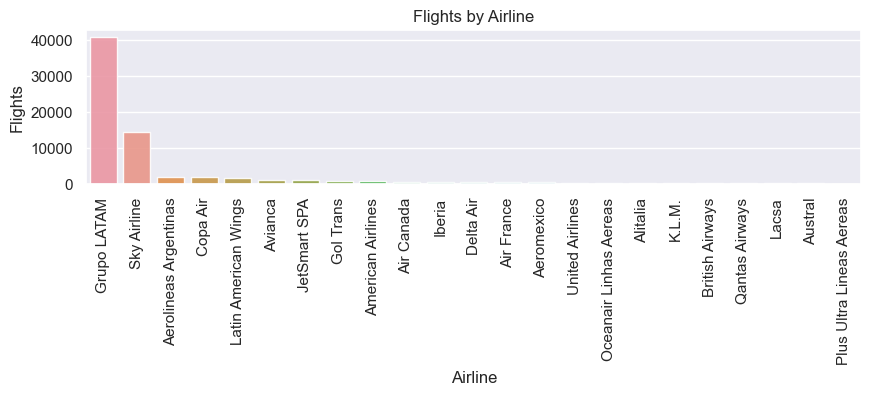

In [7]:
flights_by_airline = data['OPERA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=flights_by_airline.index, y=flights_by_airline.values, alpha=0.9)
plt.title('Flights by Airline')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

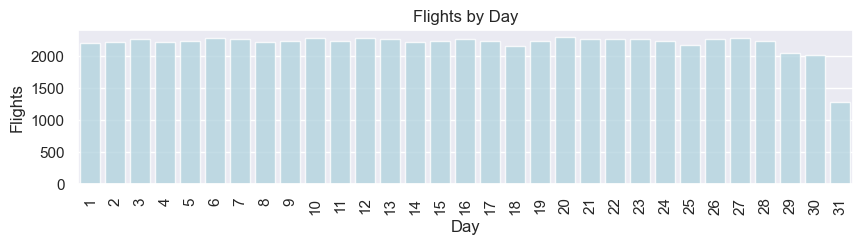

In [8]:
flights_by_day = data['DIA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(x=flights_by_day.index, y=flights_by_day.values, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation=90)
plt.show()

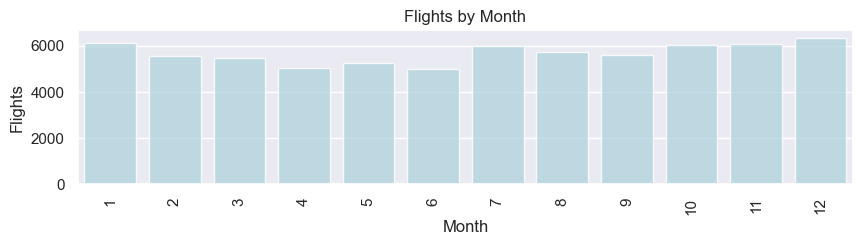

In [9]:
flights_by_month = data['MES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(x=flights_by_month.index, y=flights_by_month.values, color = 'lightblue', alpha=0.8)
plt.title('Flights by Month')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.show()

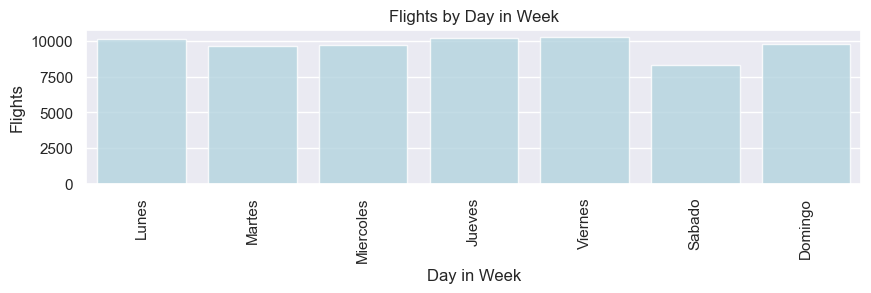

In [10]:
flights_by_day_in_week = data['DIANOM'].value_counts()
days = [
    flights_by_day_in_week.index[2], 
    flights_by_day_in_week.index[5], 
    flights_by_day_in_week.index[4], 
    flights_by_day_in_week.index[1], 
    flights_by_day_in_week.index[0], 
    flights_by_day_in_week.index[6], 
    flights_by_day_in_week.index[3]
]
values_by_day = [
    flights_by_day_in_week.values[2], 
    flights_by_day_in_week.values[5], 
    flights_by_day_in_week.values[4], 
    flights_by_day_in_week.values[1], 
    flights_by_day_in_week.values[0], 
    flights_by_day_in_week.values[6], 
    flights_by_day_in_week.values[3]
]
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=days, y=values_by_day, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day in Week')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day in Week', fontsize=12)
plt.xticks(rotation=90)
plt.show()

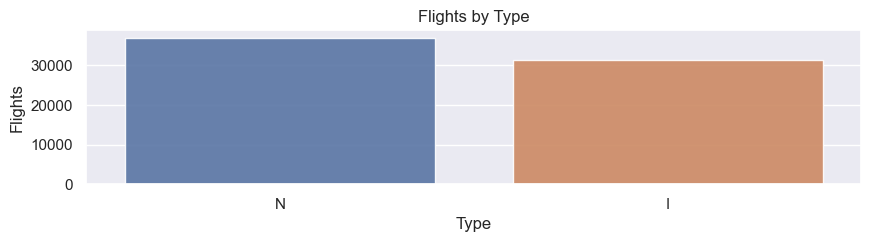

flight type N: 36966
flight type I: 31240
Relation between flight types N and I: 1.18


In [11]:
flights_by_type = data['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize = (10, 2))
sns.barplot(x=flights_by_type.index, y=flights_by_type.values, alpha=0.9)
plt.title('Flights by Type')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()
# print the amount
counts = []
flight_types = []
for flight_type, count in zip(flights_by_type.index, flights_by_type.values):
    print(f"flight type {flight_type}: {count}")
    flight_types.append(flight_type)
    counts.append(count)

relation = counts[0] / counts[1]
print(f"Relation between flight types {flight_types[0]} and {flight_types[1]}: {relation:.2f}")


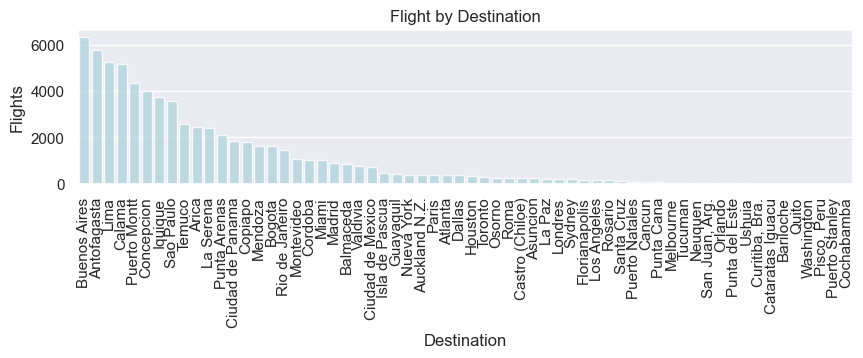

In [12]:
flight_by_destination = data['SIGLADES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=flight_by_destination.index, y=flight_by_destination.values, color = 'lightblue', alpha=0.8)
plt.title('Flight by Destination')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)

plt.show()

## 2. Features Generation

### 2.a. Period of Day

In [13]:
from datetime import datetime

def get_period_day(date):
    date_time = datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time()
    morning_min = datetime.strptime("05:00", '%H:%M').time()
    morning_max = datetime.strptime("11:59", '%H:%M').time()
    afternoon_min = datetime.strptime("12:00", '%H:%M').time()
    afternoon_max = datetime.strptime("18:59", '%H:%M').time()
    evening_min = datetime.strptime("19:00", '%H:%M').time()
    evening_max = datetime.strptime("23:59", '%H:%M').time()
    night_min = datetime.strptime("00:00", '%H:%M').time()
    night_max = datetime.strptime("4:59", '%H:%M').time()
    
    if(date_time > morning_min and date_time < morning_max):
        return 'mañana'
    elif(date_time > afternoon_min and date_time < afternoon_max):
        return 'tarde'
    elif(
        (date_time > evening_min and date_time < evening_max) or
        (date_time > night_min and date_time < night_max)
    ):
        return 'noche'

In [14]:
data['period_day'] = data['Fecha-I'].apply(get_period_day)

### 2.b. High Season

In [15]:
from datetime import datetime

def is_high_season(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0

In [16]:
data['high_season'] = data['Fecha-I'].apply(is_high_season)

### 2.c. Difference in Minutes

In [17]:
def get_min_diff(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    min_diff = ((fecha_o - fecha_i).total_seconds())/60
    return min_diff

In [18]:
data['min_diff'] = data.apply(get_min_diff, axis = 1)

### 2.d. Delay

In [19]:
threshold_in_minutes = 15
data['delay'] = np.where(data['min_diff'] > threshold_in_minutes, 1, 0)

In [20]:
# data.columns
data.info

<bound method DataFrame.info of                    Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O   
0      2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00  \
1      2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   
2      2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   
3      2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   
4      2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   
...                    ...   ...   ...   ...   ...                  ...   
68201  2017-12-22 14:55:00   400  SCEL  SPJC   JAT  2017-12-22 15:41:00   
68202  2017-12-25 14:55:00   400  SCEL  SPJC   JAT  2017-12-25 15:11:00   
68203  2017-12-27 14:55:00   400  SCEL  SPJC   JAT  2017-12-27 15:35:00   
68204  2017-12-29 14:55:00   400  SCEL  SPJC   JAT  2017-12-29 15:08:00   
68205  2017-12-31 14:55:00   400  SCEL  SPJC   JAT  2017-12-31 15:04:00   

       Vlo-O Ori-O Des-O Emp-O  ...   AÑO     DIANOM  TIPOVUELO   


## 3. Data Analysis: Second Sight

### How is the delay rate across columns?

In [21]:
def get_rate_from_column(data, column):
    delays = {}
    for _, row in data.iterrows():
        if row['delay'] == 1:
            if row[column] not in delays:
                delays[row[column]] = 1
            else:
                delays[row[column]] += 1
    total = data[column].value_counts().to_dict()
    
    rates = {}
    for name, total in total.items():
        if name in delays:
            rates[name] = round( delays[name]*100 / total, 2)
        else:
            rates[name] = 0
            
    # This was the original code that I fixed
    # Changed the rate to delays[name]*100/ total
    
    # for name, total in total.items():
    #     if name in delays:
    #         rates[name] = round(total / delays[name], 2)
    #     else:
    #         rates[name] = 0
            
    return pd.DataFrame.from_dict(data = rates, orient = 'index', columns = ['Tasa (%)'])

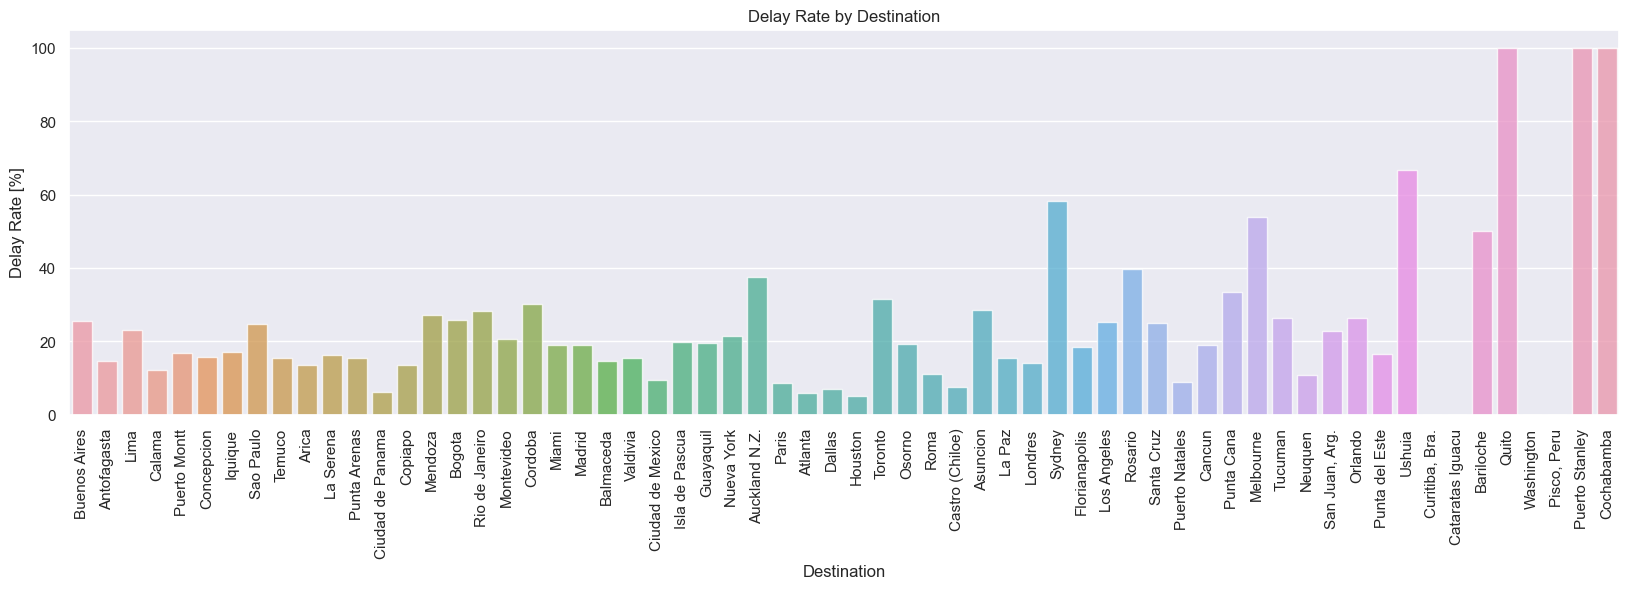

In [22]:
destination_rate = get_rate_from_column(data, 'SIGLADES')
destination_rate_values = data['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=destination_rate_values, y=destination_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Destination')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)
plt.show()


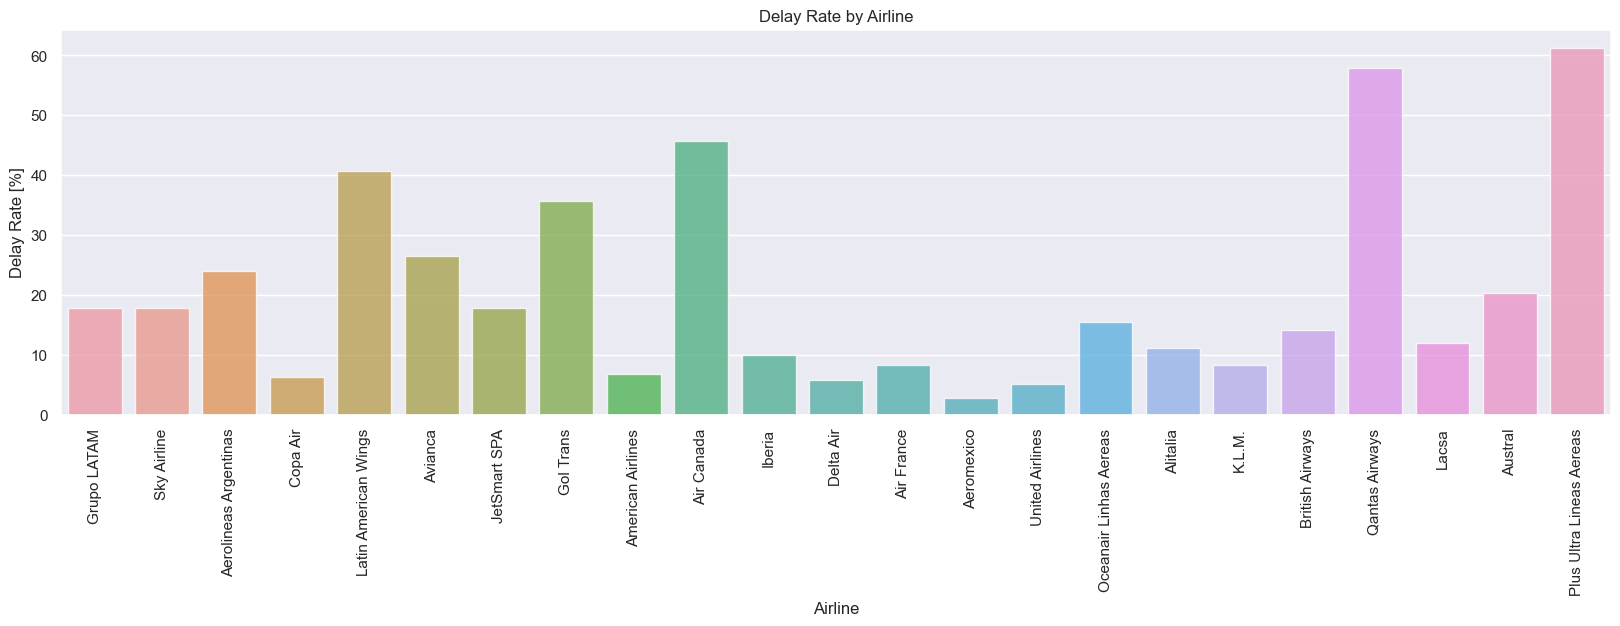

In [24]:
airlines_rate = get_rate_from_column(data, 'OPERA')
airlines_rate_values = data['OPERA'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=airlines_rate_values, y=airlines_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Airline')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

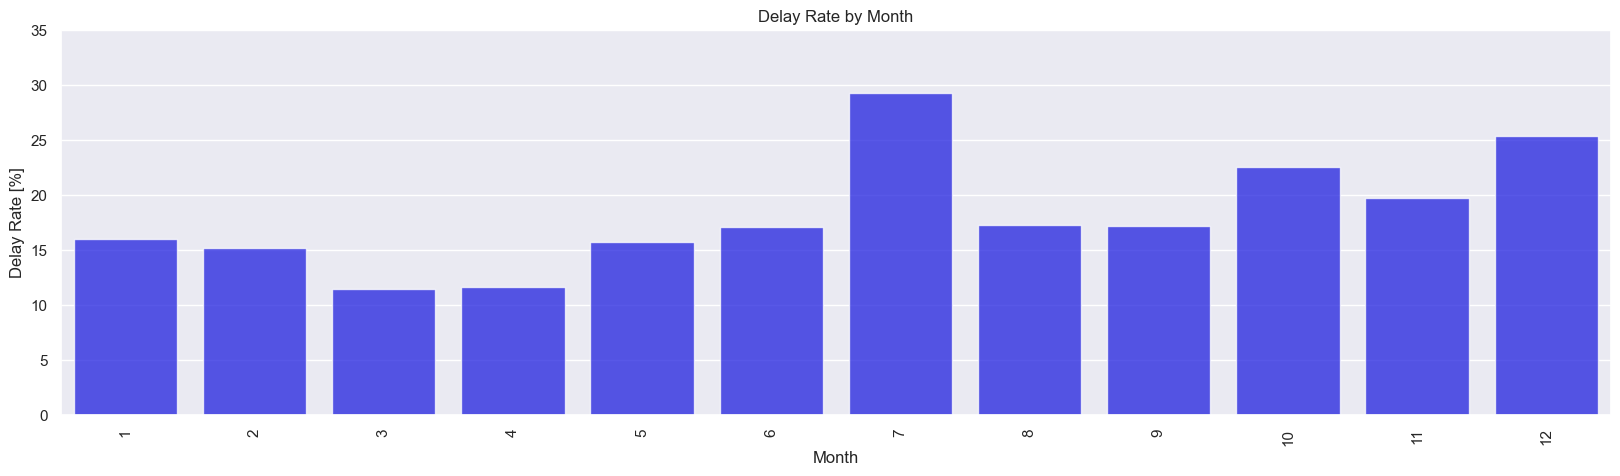

0.18493974137172683


In [25]:
month_rate = get_rate_from_column(data, 'MES')
month_rate_value = data['MES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=month_rate_value, y=month_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Month')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,35) # fixed here from 10 to 35
plt.show()

# Initially i see every month reaches 10%.
# 10% delay EVERY MONTH seems very suspicious. I will check at least that all data has to have 10% delay
print(data['delay'].sum() / data['delay'].count())
# ok so the overall ratio is about 0.185. I realise the image is cut at 10% so I fix it (cut at 35)

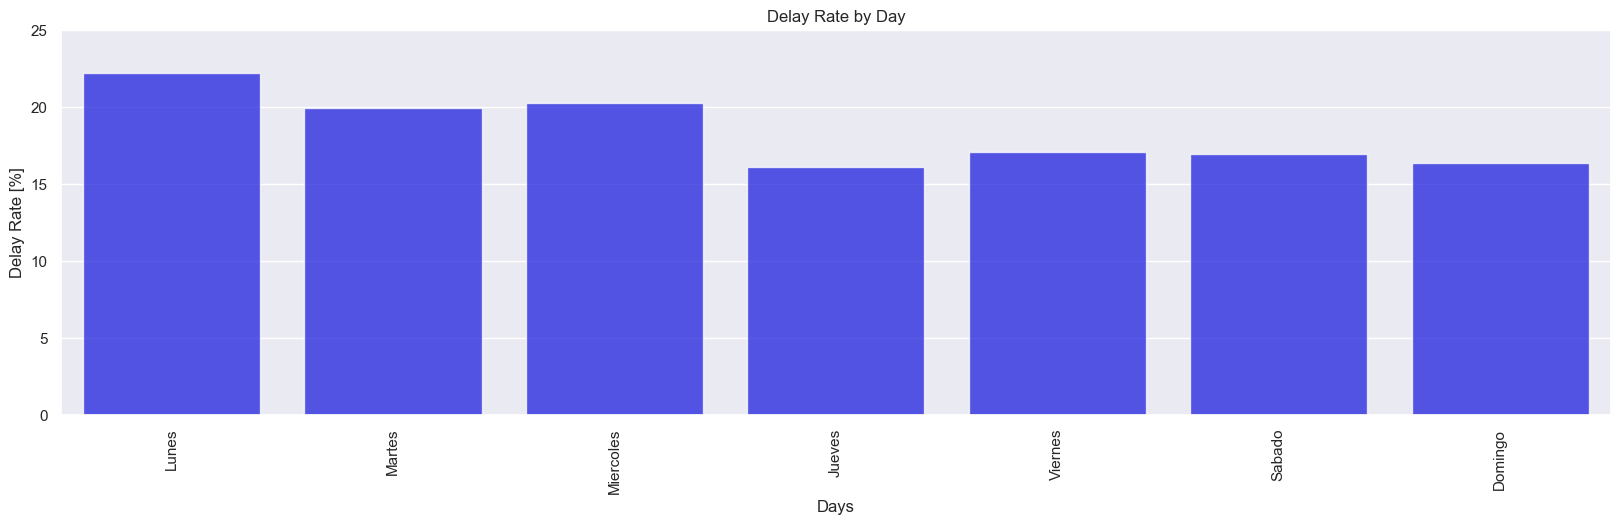

In [26]:
days_rate = get_rate_from_column(data, 'DIANOM')

# Here I do this change to maintain consistency with the same order as in the other day barplot

# days_rate_value = data['DIANOM'].value_counts().index
flights_by_day_in_week = data['DIANOM'].value_counts()
days_rate_value = [
    flights_by_day_in_week.index[2], 
    flights_by_day_in_week.index[5], 
    flights_by_day_in_week.index[4], 
    flights_by_day_in_week.index[1], 
    flights_by_day_in_week.index[0], 
    flights_by_day_in_week.index[6], 
    flights_by_day_in_week.index[3]
]


sns.set(style="darkgrid")
plt.figure(figsize = (20, 5))
sns.barplot(x=days_rate_value, y=days_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Days', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,25) # Here I cut in 25
plt.show()

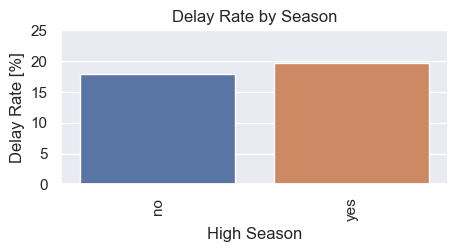

In [27]:
high_season_rate = get_rate_from_column(data, 'high_season')
high_season_rate_values = data['high_season'].value_counts().index

plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=["no", "yes"], y=high_season_rate['Tasa (%)'])
plt.title('Delay Rate by Season')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('High Season', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,25) # Here I cut in 25
plt.show()

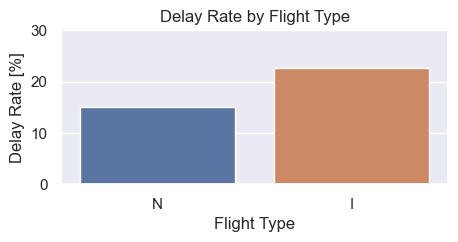

In [28]:
flight_type_rate = get_rate_from_column(data, 'TIPOVUELO')
flight_type_rate_values = data['TIPOVUELO'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=flight_type_rate_values, y=flight_type_rate['Tasa (%)'])
plt.title('Delay Rate by Flight Type')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Flight Type', fontsize=12)
plt.ylim(0, 30) # Here I cut in 30
plt.show()

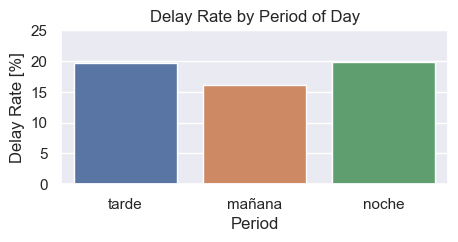

In [29]:
period_day_rate = get_rate_from_column(data, 'period_day')
period_day_rate_values = data['period_day'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=period_day_rate_values, y=period_day_rate['Tasa (%)'])
plt.title('Delay Rate by Period of Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Period', fontsize=12)
plt.ylim(0,25) # Here I cut in 25
plt.show()

## 4. Training

### 4.a. Data Split (Training and Validation)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
# Shuffling rows randomly
training_data = shuffle(data[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'delay']], random_state = 111)

In [32]:
# One-hot encoding categorical features
# Why other categories are not here?
# I changed the code here to use training_data (shuffled data), which is a good practice
features = pd.concat([
    pd.get_dummies(training_data['OPERA'], prefix = 'OPERA'),
    pd.get_dummies(training_data['TIPOVUELO'], prefix = 'TIPOVUELO'), 
    pd.get_dummies(training_data['MES'], prefix = 'MES')], 
    axis = 1
)

target = training_data['delay']

features.info

<bound method DataFrame.info of        OPERA_Aerolineas Argentinas  OPERA_Aeromexico  OPERA_Air Canada   
13375                        False             False             False  \
35799                        False             False             False   
48176                        False             False             False   
58675                        False             False             False   
23374                        False             False             False   
...                            ...               ...               ...   
37831                        False             False             False   
28790                        False             False             False   
25257                        False             False             False   
4820                         False             False             False   
10196                        False             False             False   

       OPERA_Air France  OPERA_Alitalia  OPERA_American Airlines   
13375      

In [33]:
# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

In [34]:
print(f"train shape: {x_train.shape} | test shape: {x_test.shape}")

train shape: (45698, 37) | test shape: (22508, 37)


In [35]:
# show proportion of delays in training set
y_train.value_counts('%')*100

delay
0    81.379929
1    18.620071
Name: proportion, dtype: float64

In [36]:
# shows proportion of delays in training set
y_test.value_counts('%')*100

delay
0    81.76204
1    18.23796
Name: proportion, dtype: float64

I could change the random_state to have a more uniform, better split, but I rather not touch it for the sake of reproducibility.

I guess it could be used for evaluation, so better not touch it.

### 4.b. Model Selection

#### 4.b.i. XGBoost

In [37]:
# I had to make this pip install
import xgboost as xgb
from xgboost import plot_importance

In [38]:
# Configure and fit model
xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [39]:
# Make predictions
xgboost_y_preds = xgb_model.predict(x_test)
xgboost_y_preds = [1 if y_pred > 0.5 else 0 for y_pred in xgboost_y_preds]

In [41]:
confusion_matrix(y_test, xgboost_y_preds)

array([[18359,    44],
       [ 4017,    88]], dtype=int64)

In [42]:
print(classification_report(y_test, xgboost_y_preds))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.67      0.02      0.04      4105

    accuracy                           0.82     22508
   macro avg       0.74      0.51      0.47     22508
weighted avg       0.79      0.82      0.74     22508



#### 4.b.ii. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
# Fit model
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

LogisticRegression()

In [45]:
# Make predictions
reg_y_preds = reg_model.predict(x_test)

In [46]:
confusion_matrix(y_test, reg_y_preds)

array([[18311,    92],
       [ 3985,   120]], dtype=int64)

In [47]:
print(classification_report(y_test, reg_y_preds))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



## 5. Data Analysis: Third Sight

### Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1000x500 with 0 Axes>

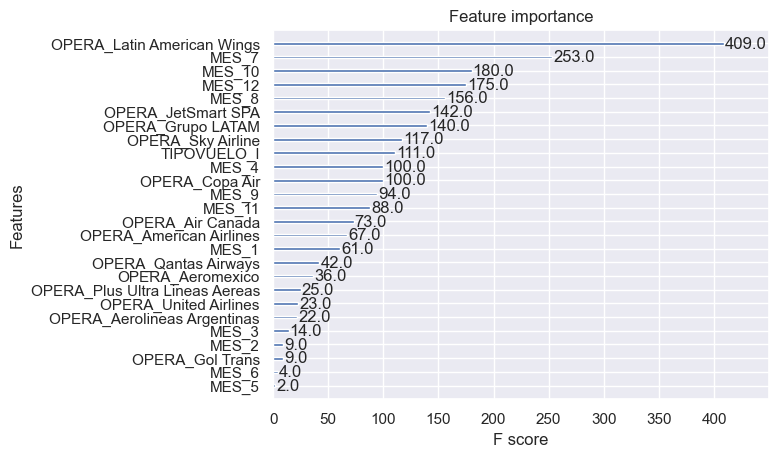

In [48]:
plt.figure(figsize = (10,5))
plot_importance(xgb_model)

In [49]:
top_10_features = [
    "OPERA_Latin American Wings", 
    "MES_7",
    "MES_10",
    "OPERA_Grupo LATAM",
    "MES_12",
    "TIPOVUELO_I",
    "MES_4",
    "MES_11",
    "OPERA_Sky Airline",
    "OPERA_Copa Air"
]

### Data Balance

In [50]:
n_y0 = len(y_train[y_train == 0])
n_y1 = len(y_train[y_train == 1])
scale = n_y0/n_y1
print(scale)

4.3705488306499


## 6. Training with Improvement

### 6.a. Data Split

In [51]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features[top_10_features], target, test_size = 0.33, random_state = 42)

### 6.b. Model Selection

#### 6.b.i. XGBoost with Feature Importance and with Balance

In [52]:
xgb_model_2 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight = scale)
xgb_model_2.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [53]:
xgboost_y_preds_2 = xgb_model_2.predict(x_test2)

In [54]:
confusion_matrix(y_test2, xgboost_y_preds_2)

array([[9596, 8807],
       [1303, 2802]], dtype=int64)

In [55]:
print(classification_report(y_test2, xgboost_y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.52      0.65     18403
           1       0.24      0.68      0.36      4105

    accuracy                           0.55     22508
   macro avg       0.56      0.60      0.51     22508
weighted avg       0.76      0.55      0.60     22508



#### 6.b.ii. XGBoost with Feature Importance but without Balance

In [56]:
xgb_model_3 = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model_3.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [57]:
xgboost_y_preds_3 = xgb_model_3.predict(x_test2)

In [58]:
confusion_matrix(y_test2, xgboost_y_preds_3)

array([[18395,     8],
       [ 4082,    23]], dtype=int64)

In [59]:
print(classification_report(y_test2, xgboost_y_preds_3))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.74      0.01      0.01      4105

    accuracy                           0.82     22508
   macro avg       0.78      0.50      0.46     22508
weighted avg       0.80      0.82      0.74     22508



#### 6.b.iii. Logistic Regression with Feature Importante and with Balance

In [60]:
reg_model_2 = LogisticRegression(class_weight={1: n_y0/len(y_train), 0: n_y1/len(y_train)})
reg_model_2.fit(x_train2, y_train2)

LogisticRegression(class_weight={0: 0.18620070900258218, 1: 0.8137992909974179})

In [61]:
reg_y_preds_2 = reg_model_2.predict(x_test2)

In [62]:
confusion_matrix(y_test2, reg_y_preds_2)

array([[10798,  7605],
       [ 1619,  2486]], dtype=int64)

In [63]:
print(classification_report(y_test2, reg_y_preds_2))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70     18403
           1       0.25      0.61      0.35      4105

    accuracy                           0.59     22508
   macro avg       0.56      0.60      0.53     22508
weighted avg       0.76      0.59      0.64     22508



#### 6.b.iv. Logistic Regression with Feature Importante but without Balance

In [64]:
reg_model_3 = LogisticRegression()
reg_model_3.fit(x_train2, y_train2)

LogisticRegression()

In [65]:
reg_y_preds_3 = reg_model_3.predict(x_test2)

In [66]:
confusion_matrix(y_test2, reg_y_preds_3)

array([[18357,    46],
       [ 4048,    57]], dtype=int64)

In [67]:
print(classification_report(y_test2, reg_y_preds_3))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.55      0.01      0.03      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.46     22508
weighted avg       0.77      0.82      0.74     22508



## 7. Data Science Conclusions

By looking at the results of the 6 trained models, it can be determined:
- There is no noticeable difference in results between XGBoost and LogisticRegression.
- Does not decrease the performance of the model by reducing the features to the 10 most important.
- Improves the model's performance when balancing classes, since it increases the recall of class "1".

**With this, the model to be productive must be the one that is trained with the top 10 features and class balancing, but which one?**